<a href="https://colab.research.google.com/github/MuhammadTanveerm/Customer-Segmentation_Using_KMeans_All_Steps/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')


# **Import/Load Dataset**

In [20]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects ML/ Customer Segmentation using K-Means Clustering/Mall_Customers.csv")

# **Exploratory Data Analysis (EDA)**

In [21]:
#Basic EDA
print("Shape of Dataset: ")
print(df.shape)

print("First 5 Rows: ")
print(df.head())

print("Information about Dataset: ")
print(df.info())

print("Statistical Info: ")
print(df.describe())


Shape of Dataset: 
(200, 5)
First 5 Rows: 
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Information about Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory 

Missing Values

In [22]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


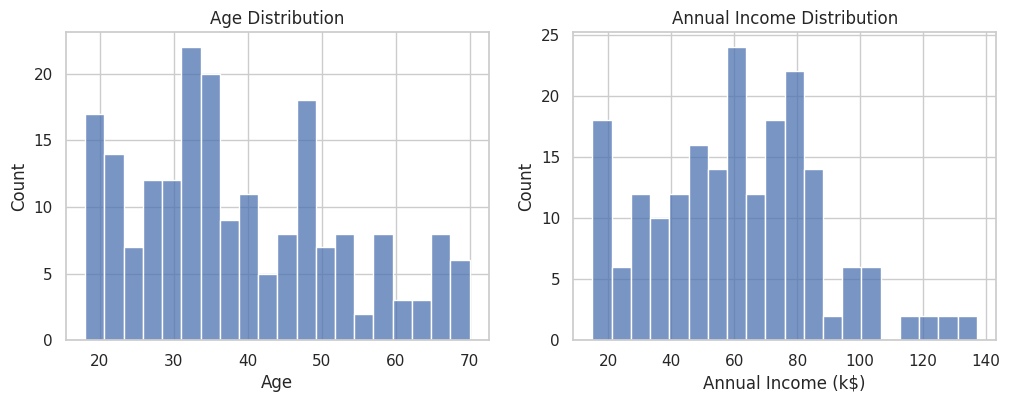

In [23]:
#Basic Distribution

#Age
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=False)
plt.title('Age Distribution')



#Annul Income Distribution
plt.subplot(1,2,2)
sns.histplot(df['Annual Income (k$)'], bins=20)
plt.title('Annual Income Distribution')
plt.show()

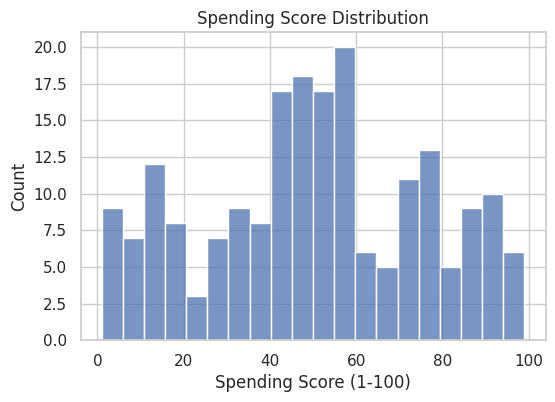

In [24]:
#Spending Score Distribution
plt.figure(figsize=(6, 4))

sns.histplot(df['Spending Score (1-100)'], bins=20)
plt.title('Spending Score Distribution')
plt.show()

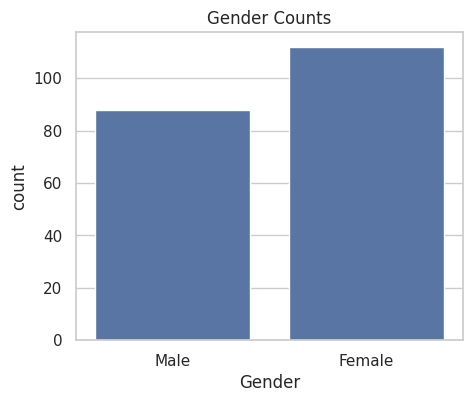

In [25]:
#Gender Counts
plt.figure(figsize=(5, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Counts')
plt.show()

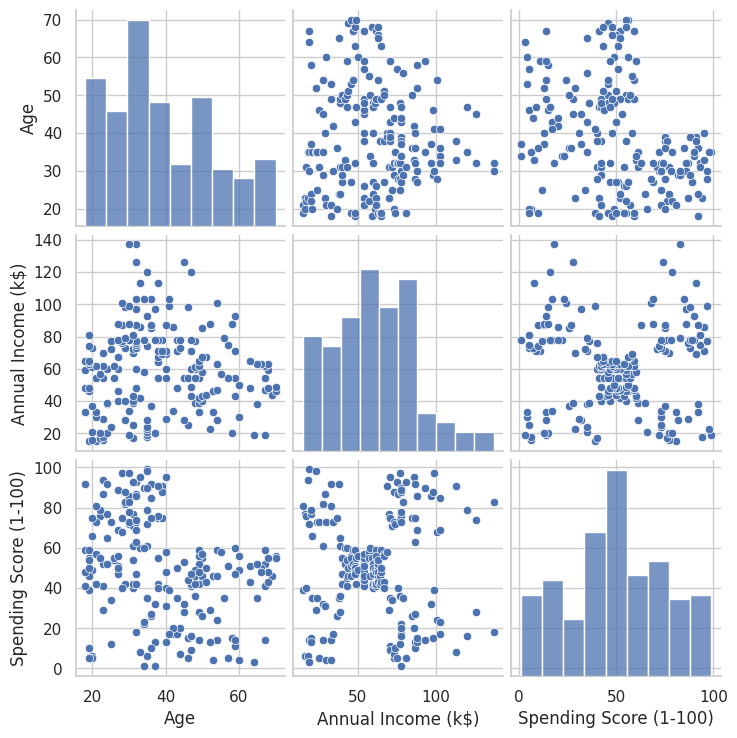

In [26]:
#Numerical Columns
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

plt.show()

# **Preprocessing**

In [27]:
#Using Age Annual Income Spending Score and scale them:
features  = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Dimensionality Reduction  (PCA to 2D)**

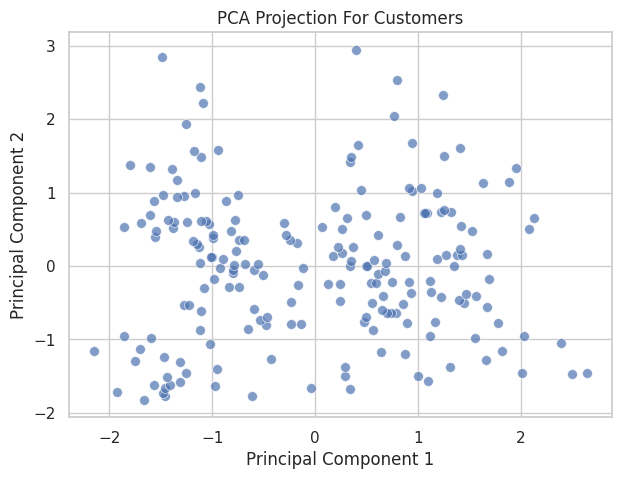

In [28]:

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], s=50, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection For Customers')
plt.show()

# **Choose numbers of clusters (Elbow + Silhouette)**

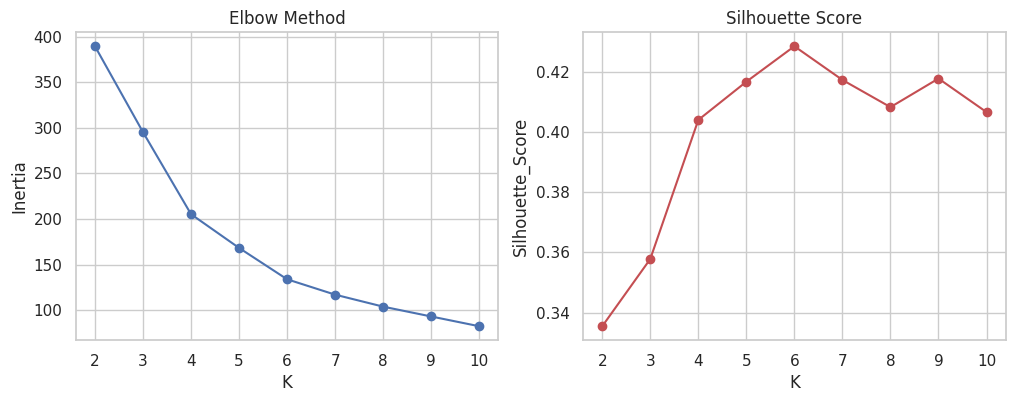

In [29]:
inertia = []
sil_score = []

K = range(2,11)

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  labels = kmeans.fit_predict(X_scaled)
  inertia.append(kmeans.inertia_)

  sil_score.append(silhouette_score(X_scaled, labels))


#Visualization

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

plt.plot(K, inertia , 'bo-')
plt.xlabel("K");
plt.ylabel("Inertia")
plt.title("Elbow Method")

plt.subplot(1,2,2)
plt.plot(K, sil_score, 'ro-')
plt.xlabel('K');

plt.ylabel('Silhouette_Score')
plt.title("Silhouette Score")

plt.show()

## Optimal Number of Clusters

Based on both the Elbow Method and Silhouette Score, the optimal number of clusters for this dataset is determined to be **6**.

- **Elbow Method**: The plot of inertia against the number of clusters shows a significant 'elbow' or bend around K=5 or K=6, indicating that adding more clusters beyond this point provides diminishing returns in reducing within-cluster sum of squares.
- **Silhouette Score**: The plot of the Silhouette Score against the number of clusters shows the highest score at K=6. A higher Silhouette Score indicates that clusters are well-separated from other clusters.

# **Fit K Means $ attach Labels**

In [30]:
best_k = 6
kmeans = KMeans(n_clusters= best_k, random_state=42, n_init=50)
labels = kmeans.fit_predict(X_scaled)
#add segments
df['Segments'] = labels
df['Segments'] = df["Segments"].astype(int)

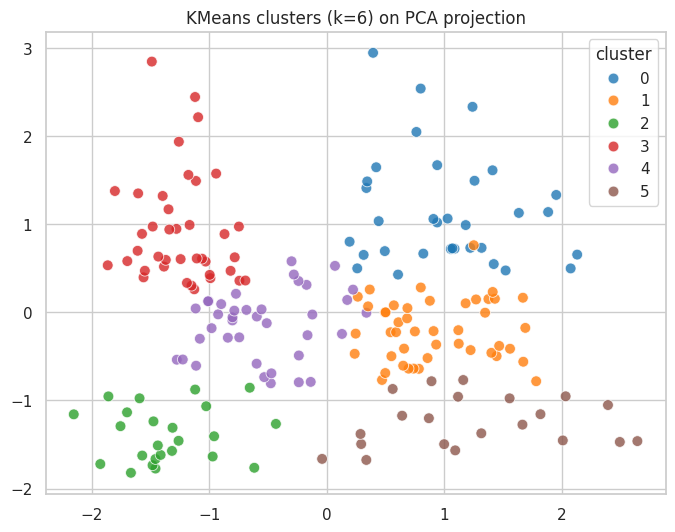

In [31]:
plt.figure(figsize=(8,6))
palette = sns.color_palette('tab10', best_k)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette=palette, s=60, alpha=0.8)
plt.title(f'KMeans clusters (k={best_k}) on PCA projection')
plt.legend(title='cluster')
plt.show()


Feature-wise boxplot to profile clusters

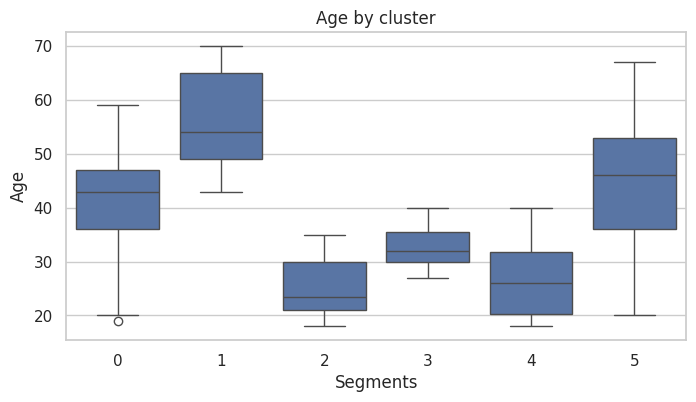

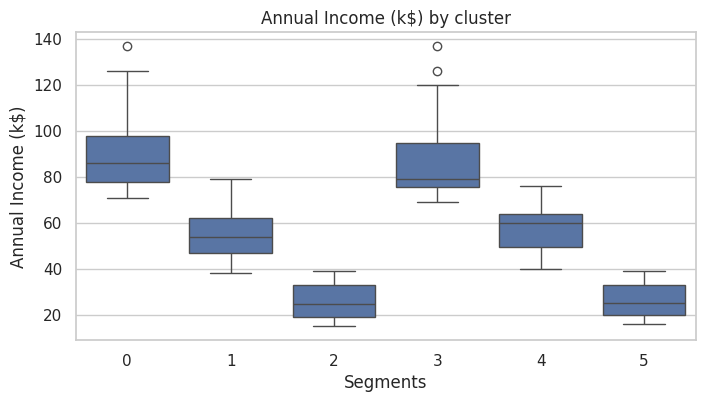

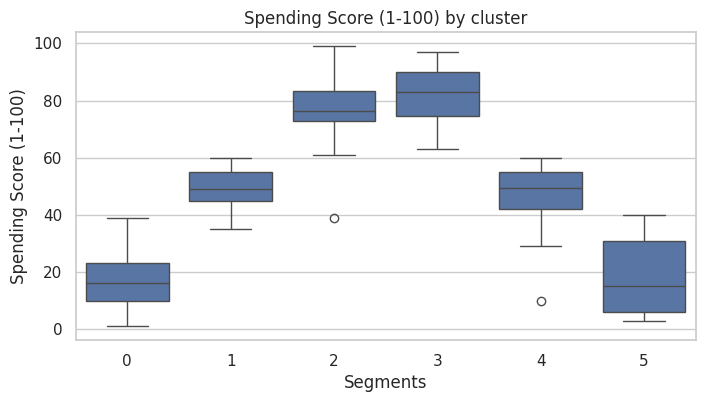

In [32]:
for col in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Segments', y=col, data=df)
    plt.title(f'{col} by cluster')
    plt.show()


Cluster centers in original feature space:

In [33]:
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers, columns=features)
centers_df['segment'] = range(best_k)
centers_df


,Age,Annual Income (k$),Spending Score (1-100),segment
0,41.939394,88.939394,16.969697,0
1,56.333333,54.266667,49.066667,1
2,25.250000,25.833333,76.916667,2
3,32.692308,86.538462,82.128205,3
4,26.684211,57.578947,47.789474,4
5,45.523810,26.285714,19.380952,5


Cluster Profiling and Interpretation

In [34]:
profile = df.groupby('Segments')[features].agg(['count','mean','median']).round(2)
profile

Age               Annual Income (k$)                \
         count   mean median              count   mean median   
Segments                                                        
0           33  41.94   43.0                 33  88.94   86.0   
1           45  56.33   54.0                 45  54.27   54.0   
2           24  25.25   23.5                 24  25.83   24.5   
3           39  32.69   32.0                 39  86.54   79.0   
4           38  26.68   26.0                 38  57.58   60.0   
5           21  45.52   46.0                 21  26.29   25.0   

         Spending Score (1-100)                
                          count   mean median  
Segments                                       
0                            33  16.97   16.0  
1                            45  49.07   49.0  
2                            24  76.92   76.5  
3                            39  82.13   83.0  
4                            38  47.79   49.5  
5                            21  19.38   15.0

# **Validate Clusters Quantitatively**

In [35]:
sil = silhouette_score(X_scaled, labels)
db = davies_bouldin_score(X_scaled, labels)
print(f"Silhouette Score: {sil:.3f}")
print(f"Davies-Bouldin Index: {db:.3f} (lower is better)")


Silhouette Score: 0.427
Davies-Bouldin Index: 0.828 (lower is better)


## Final Clustering and Segmentation

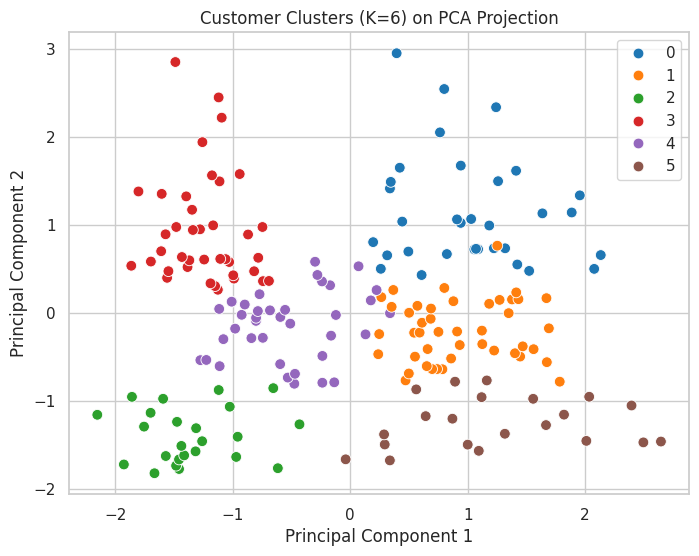

Cluster centers:


,Age,Annual Income (k$),Spending Score (1-100),segment
0,41.939394,88.939394,16.969697,0
1,56.333333,54.266667,49.066667,1
2,25.250000,25.833333,76.916667,2
3,32.692308,86.538462,82.128205,3
4,26.684211,57.578947,47.789474,4
5,45.523810,26.285714,19.380952,5



Cluster profile:


Age               Annual Income (k$)                \
        count   mean median              count   mean median   
segment                                                        
0          33  41.94   43.0                 33  88.94   86.0   
1          45  56.33   54.0                 45  54.27   54.0   
2          24  25.25   23.5                 24  25.83   24.5   
3          39  32.69   32.0                 39  86.54   79.0   
4          38  26.68   26.0                 38  57.58   60.0   
5          21  45.52   46.0                 21  26.29   25.0   

        Spending Score (1-100)                
                         count   mean median  
segment                                       
0                           33  16.97   16.0  
1                           45  49.07   49.0  
2                           24  76.92   76.5  
3                           39  82.13   83.0  
4                           38  47.79   49.5  
5                           21  19.38   15.0


Metrics:
Silhouette Score: 0.42742814991580175
Davies-Bouldin Score: 0.8277427938879608


In [36]:
best_k = 6
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=50)
labels = kmeans.fit_predict(X_scaled)
df['segment'] = labels

# PCA for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='tab10', s=60)
plt.title(f'Customer Clusters (K={best_k}) on PCA Projection');
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Profile cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=features)
centers_df['segment'] = range(best_k)
print('Cluster centers:')
display(centers_df)

print('\nCluster profile:')
display(df.groupby('segment')[features].agg(['count','mean','median']).round(2))

print('\nMetrics:')
print('Silhouette Score:', silhouette_score(X_scaled, labels))
print('Davies-Bouldin Score:', davies_bouldin_score(X_scaled, labels))

# **A Complete Combine Code For Segmentations**

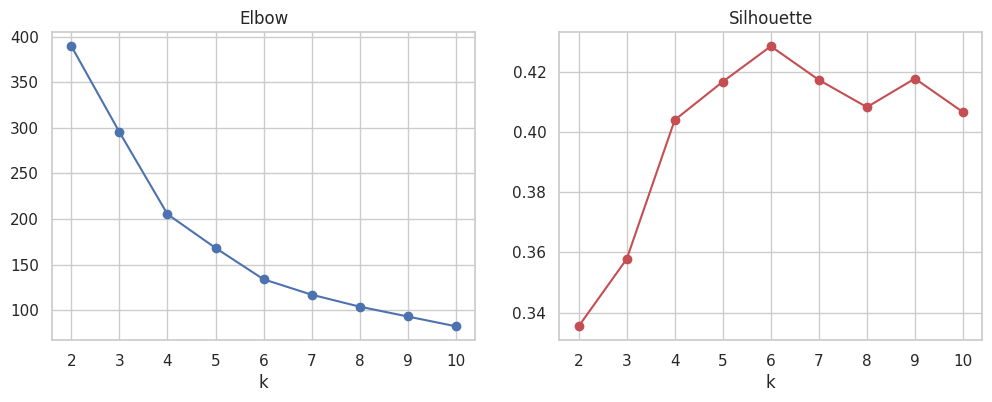

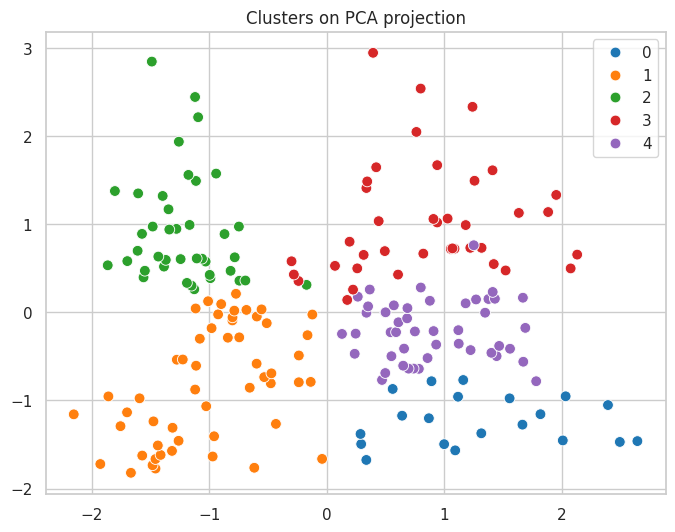

Cluster centers:
         Age  Annual Income (k$)  Spending Score (1-100)  segment
0  46.250000           26.750000               18.350000        0
1  25.185185           41.092593               62.240741        1
2  32.875000           86.100000               81.525000        2
3  39.871795           86.102564               19.358974        3
4  55.638298           54.382979               48.851064        4

Cluster profile:
          Age               Annual Income (k$)                \
        count   mean median              count   mean median   
segment                                                        
0          20  46.25   47.0                 20  26.75   26.5   
1          54  25.19   24.0                 54  41.09   40.0   
2          40  32.88   32.0                 40  86.10   78.5   
3          39  39.87   41.0                 39  86.10   78.0   
4          47  55.64   54.0                 47  54.38   54.0   

        Spending Score (1-100)                
         

In [37]:
# --- imports ---
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# --- load data ---
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects ML/ Customer Segmentation using K-Means Clustering/Mall_Customers.csv")  # update path
features = ['Age','Annual Income (k$)','Spending Score (1-100)']
X = df[features].copy()

# --- scale ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- find k ---
inertia, sil_scores = [], []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labs = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labs))

# plot elbow & silhouette
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.plot(K, inertia, 'o-'); plt.title('Elbow'); plt.xlabel('k')
plt.subplot(1,2,2); plt.plot(K, sil_scores, 'o-r'); plt.title('Silhouette'); plt.xlabel('k')
plt.show()

# --- final clustering ---
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=50)
labels = kmeans.fit_predict(X_scaled)
df['segment'] = labels

# --- pca for viz ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='tab10', s=60)
plt.title('Clusters on PCA projection'); plt.show()

# --- profile centers ---
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=features)
centers_df['segment'] = range(best_k)
print('Cluster centers:')
print(centers_df)

print('\nCluster profile:')
print(df.groupby('segment')[features].agg(['count','mean','median']).round(2))

print('\nMetrics:')
print('Silhouette:', silhouette_score(X_scaled, labels))
print('Davies-Bouldin:', davies_bouldin_score(X_scaled, labels))
